In [19]:
!pip install kaggle 

In [49]:
mkdir C:\Users\arain\.kaggle

In [55]:
#alr moved through cmd prompt

In [79]:
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

challenges-in-representation-learning-facial-expression-recognition-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [83]:
import os
print(os.getcwd())
import os
print(os.listdir('.'))

C:\Users\arain
['.anaconda', '.bash_history', '.conda', '.condarc', '.continuum', '.git', '.gitconfig', '.idea', '.ipynb_checkpoints', '.ipython', '.jupyter', '.kaggle', '.keras', '.matplotlib', '.ms-ad', '.vscode', 'anaconda3', 'ansel', 'AppData', 'Application Data', 'challenges-in-representation-learning-facial-expression-recognition-challenge.zip', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'dsv project.ipynb', 'Favorites', 'iCloudDrive', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'MNIST 2.ipynb', 'MNIST.ipynb', 'Music', 'My Documents', 'my_model.h5', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{43dc0a1f-587f-11ef-b78d-d0864fa688af}.TxR.0.regtrans-ms', 'NTUSER.DAT{43dc0a1f-587f-11ef-b78d-d0864fa688af}.TxR.1.regtrans-ms', 'NTUSER.DAT{43dc0a1f-587f-11ef-b78d-d0864fa688af}.TxR.2.regtrans-ms', 'NTUSER.DAT{43dc0a1f-587f-11ef-b78d-d0864fa688af}.TxR.blf', 'NTUSER.DAT{43dc0a20-587f-11ef-b78d-d0864fa688af}.TM.blf', 'NTUSER.DAT{43dc0a20-

CODE:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [49]:
icml_faces = pd.read_csv('icml_face_data.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to CSV files
train_path = r"C:\Users\arain\challenges-in-representation-learning-facial-expression-recognition-challenge\train.csv"

# Load FER dataset from CSV
train_data = pd.read_csv(train_path)

# Extract pixels and labels from the training dataset
pixels = train_data['pixels'].tolist()
labels = train_data['emotion'].tolist()

# Convert pixel strings to numpy arrays for training data
images = np.array([np.fromstring(pixel, sep=' ') for pixel in pixels], dtype='float32')
images = images.reshape(-1, 48, 48, 1)  # Reshape to (num_samples, 48, 48, 1) for grayscale
images /= 255.0  # Normalize pixel values to range [0, 1]

# One-hot encode the labels
labels = to_categorical(labels, num_classes=7)

# Split the data into training and validation sets
train_x, val_x, train_y, val_y = train_test_split(images, labels, test_size=0.2, random_state=42)

# Initialize ImageDataGenerator for augmentation (optional)
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [11]:
emotion_num_map = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}


In [193]:
def plot_images(df, emotion_class):

    emo_df = df[df.emotion==emotion_class]

    row = emo_df.sample(1)

    img = np.fromstring(row[' pixels'].iloc[0], dtype=int, sep=' ')

    img = np.reshape(img, (48, 48))

    image = np.zeros((48,48,3))

    image[:,:,0] = img

    image[:,:,1] = img

    image[:,:,2] = img

    image = np.array(image.astype(np.uint8))

    return image

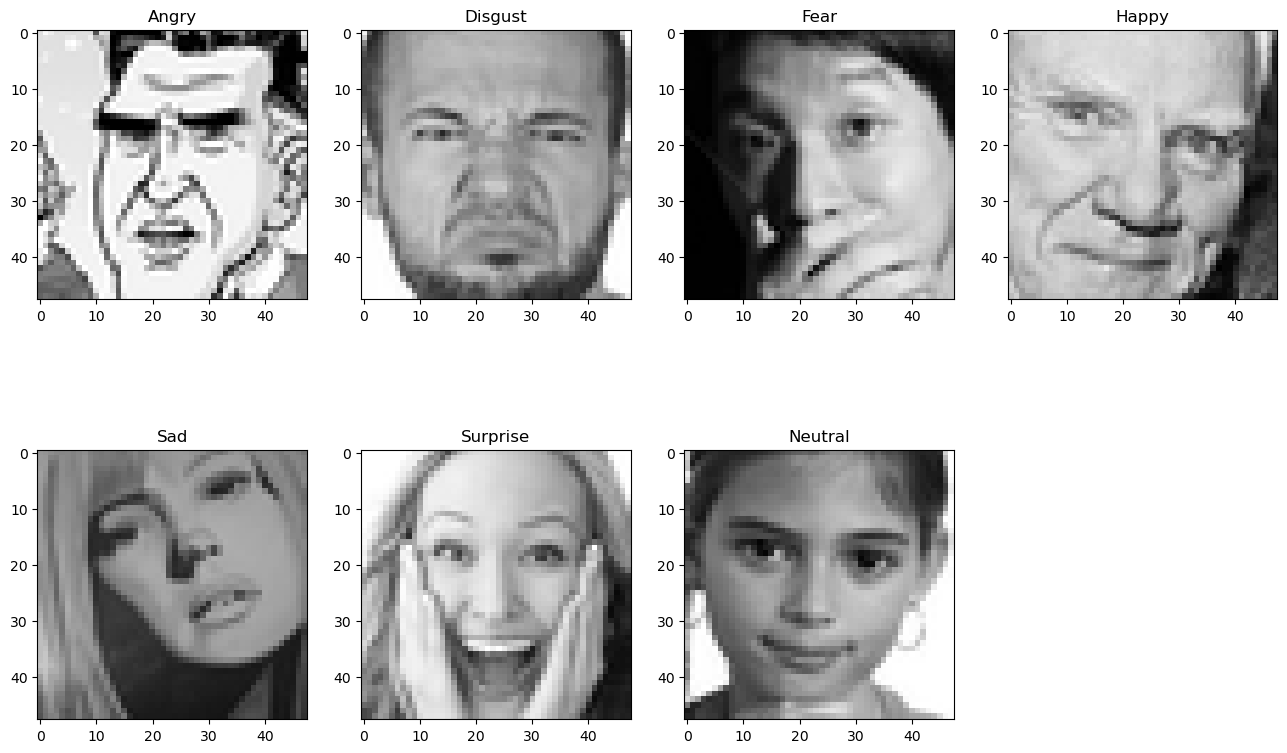

In [195]:
plt.figure(0, figsize=(16,10))

for i in range(7):

    plt.subplot(2,4,i+1)

    image = plot_images(icml_faces,i)

    plt.imshow(image)

    plt.title( emotion_num_map[i])

In [189]:
icml_faces['emotion'].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout, Dense

def fer_improved_cnn():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(0.5))

    model.add(Dense(64, activation='softmax'))
    model.add(Dense(7, activation='softmax'))

    return model

model = fer_improved_cnn()


C:\Users\arain\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [138]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use this for integer labels
              metrics=['accuracy'])


In [134]:
# Check the labels
#print(train_y[:5])  # Should output integers like [0, 1, 2, ...]

# If the labels are one-hot encoded, convert them to sparse integers:
if train_y.ndim == 2:  # If one-hot encoded
    train_y = np.argmax(train_y, axis=1)
    val_y = np.argmax(val_y, axis=1)


print(train_y[:5])


[4 3 0 5 1]


In [140]:
print(train_x.shape)  # Should be (num_samples, 48, 48, 1)
print(train_y.shape)  # Should be (num_samples,)
print(val_x.shape)    # Validation data
print(val_y.shape)    # Validation labels

(22967, 48, 48, 1)
(22967,)
(5742, 48, 48, 1)
(5742,)


In [142]:
print(np.unique(train_y))  # Ensure it matches the number of output classes

[0 1 2 3 4 5 6]


In [154]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Add callbacks for better monitoring
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)  # Save as .keras file
]

# Train the model with validation data
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=50, batch_size=32, callbacks=callbacks)



Epoch 1/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 66s 80ms/step - accuracy: 0.4873 - loss: 1.3775 - val_accuracy: 0.4624 - val_loss: 1.4449
Epoch 2/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.4899 - loss: 1.3601 - val_accuracy: 0.4242 - val_loss: 1.5135
Epoch 3/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 57s 80ms/step - accuracy: 0.5032 - loss: 1.3430 - val_accuracy: 0.3863 - val_loss: 1.6212
Epoch 4/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 57s 80ms/step - accuracy: 0.5002 - loss: 1.3464 - val_accuracy: 0.4615 - val_loss: 1.4296
Epoch 5/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 68s 94ms/step - accuracy: 0.5081 - loss: 1.3247 - val_accuracy: 0.4321 - val_loss: 1.5024
Epoch 6/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.5093 - loss: 1.3223 - val_accuracy: 0.4763 - val_loss: 1.4489
Epoch 7/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 56s 78ms/step - accuracy: 0.5123 - loss: 1.3247 - val_accuracy: 0.4742 - val_loss: 1.3893
Epoch 8/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 58s 81ms/step - accuracy: 0.5224 - loss: 1.3049 - 

In [155]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(train_y), y=train_y)
class_weights_dict = dict(enumerate(class_weights))

model.fit(train_x, train_y, class_weight=class_weights_dict, epochs=30, batch_size=32)


Epoch 1/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.5263 - loss: 1.4959
Epoch 2/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.4831 - loss: 1.4351
Epoch 3/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 68s 95ms/step - accuracy: 0.4791 - loss: 1.4395
Epoch 4/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 52s 72ms/step - accuracy: 0.4931 - loss: 1.4254
Epoch 5/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 56s 77ms/step - accuracy: 0.5055 - loss: 1.3701
Epoch 6/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 71s 99ms/step - accuracy: 0.5012 - loss: 1.3776
Epoch 7/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 51s 71ms/step - accuracy: 0.4995 - loss: 1.4177
Epoch 8/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 67s 94ms/step - accuracy: 0.5120 - loss: 1.3768
Epoch 9/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 58s 81ms/step - accuracy: 0.5192 - loss: 1.3590
Epoch 10/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 56s 78ms/step - accuracy: 0.5158 - loss: 1.3411
Epoch 11/30
718/718 ━━━━━━━━━━━━━━━━━━━━ 88s 122ms/step - accuracy: 0.5113 - loss: 1.3557
Epoch 12/30
718/718 ━━━━━━━━━

In [146]:
# Print the model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 956,503 (3.65 MB)

 Trainable params: 318,727 (1.22 MB)

 Non-trainable params: 320 (1.25 KB)

 Optimizer params: 637,456 (2.43 MB)

In [96]:
#train

# Compile the model
model.compile(
    optimizer='adam',  # Optimizer (can also try 'sgd', 'rmsprop', etc.)
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metrics to monitor during training
)

# Train the model
history = model.fit(
    datagen.flow(train_x, train_y, batch_size=64),  # Augmented training data
    validation_data=(val_x, val_y),  # Validation data
    epochs=20,
    batch_size=64
)

C:\Users\arain\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 79s 190ms/step - accuracy: 0.2443 - loss: 2.1731 - val_accuracy: 0.2459 - val_loss: 1.7935
Epoch 2/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 105s 294ms/step - accuracy: 0.3602 - loss: 1.6420 - val_accuracy: 0.4220 - val_loss: 1.5245
Epoch 3/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 68s 190ms/step - accuracy: 0.4134 - loss: 1.5195 - val_accuracy: 0.4669 - val_loss: 1.4016
Epoch 4/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 90s 251ms/step - accuracy: 0.4477 - loss: 1.4363 - val_accuracy: 0.4678 - val_loss: 1.3844
Epoch 5/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 72s 199ms/step - accuracy: 0.4628 - loss: 1.3869 - val_accuracy: 0.4336 - val_loss: 1.4323
Epoch 6/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 93s 260ms/step - accuracy: 0.4845 - loss: 1.3325 - val_accuracy: 0.4801 - val_loss: 1.3502
Epoch 7/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 64s 179ms/step - accuracy: 0.4946 - loss: 1.3142 - val_accuracy: 0.4977 - val_loss: 1.2991
Epoch 8/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 98s 274ms/step - accuracy: 0.5123 - loss: 

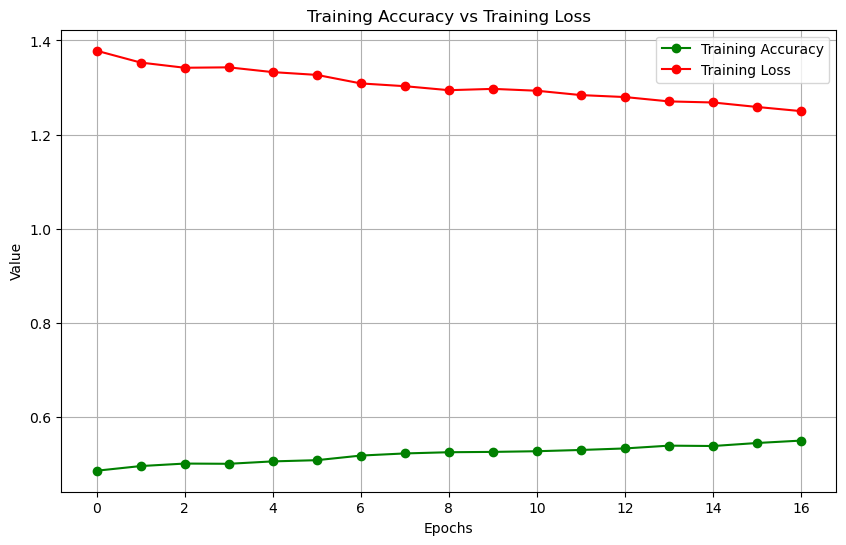

In [158]:
import matplotlib.pyplot as plt

# After training, access the accuracy and loss values
train_accuracy = history.history['accuracy']  # Extract training accuracy
train_loss = history.history['loss']          # Extract training loss

# Plot training accuracy vs training loss
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='green', marker='o')
plt.plot(train_loss, label='Training Loss', color='red', marker='o')
plt.title('Training Accuracy vs Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



TEST

In [108]:
# Path to the test CSV file
test_path = r"C:\Users\arain\challenges-in-representation-learning-facial-expression-recognition-challenge\test.csv"

# Load test dataset
test_data = pd.read_csv(test_path)

# Extract pixel data from the test dataset
test_pixels = test_data['pixels'].tolist()

# Convert pixel strings to numpy arrays
test_images = np.array([np.fromstring(pixel, sep=' ') for pixel in test_pixels], dtype='float32')
test_images = test_images.reshape(-1, 48, 48, 1)  # Reshape to (num_samples, 48, 48, 1)
test_images /= 255.0  # Normalize pixel values to range [0, 1]

# Initialize ImageDataGenerator for augmentation (optional)
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


In [160]:
# Predict emotions for the test dataset
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Get the index of the highest probability

# Map numeric labels to emotion names (based on your training data's label mapping)
emotion_num_map = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}
predicted_emotions = [emotion_num_map[label] for label in predicted_labels]

# Save predictions to a CSV file
output_df = pd.DataFrame({
    'ImageID': range(1, len(predicted_emotions) + 1),
    'PredictedEmotion': predicted_emotions
})
output_df.to_csv("predicted_emotions.csv", index=False)

print("Predictions saved to 'predicted_emotions.csv'")


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Predictions saved to 'predicted_emotions.csv'


In [162]:
# Compile the model if needed (for evaluation)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use the loss you trained with
              metrics=['accuracy'])

# Ensure test_x and test_y are correctly defined
# test_x should contain preprocessed test images
# test_y should contain the true labels (sparse integer labels, not one-hot encoded)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_x, test_y, batch_size=32)  # Adjust batch_size as needed
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4667 - loss: 1.6088
Test Loss: 1.6133427619934082
Test Accuracy: 0.4625243842601776


In [156]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test data
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(test_y, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(test_y, predicted_labels, target_names=emotion_labels))


225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


NameError: name 'emotion_labels' is not defined

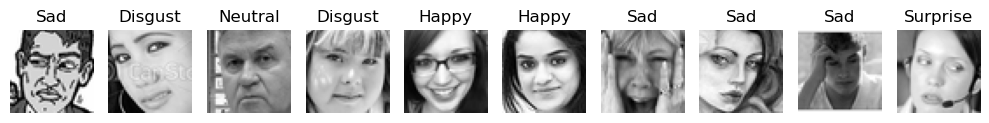

In [176]:
import matplotlib.pyplot as plt

# Display a few test images with predictions
num_images_to_display = 10
plt.figure(figsize=(10, 5))

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(test_images[i].reshape(48, 48), cmap='gray')
    plt.title(predicted_emotions[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
